# Design FIR LPF Filter using Kaiser Window satisfying following specification

Delta =  0.0057563991496219135
Stopband Attenuation =  44.79698199287367
Transion width =  2.565945821230757
Alpha =  3.952357339238006
Order of the filter =  22.0


C:\Users\ESLAB-11\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


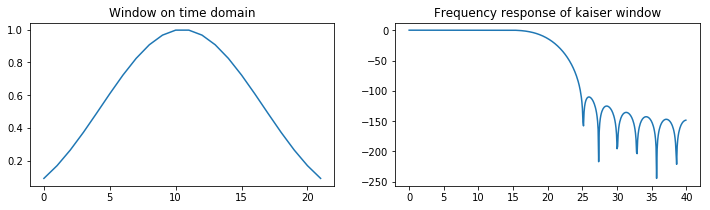

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f = 80; fp = 15; fs = 25;
fc = (fp+fs)/2;                     #Step 1
wc = 2*np.pi*fc/f;
sa1 = 38; pa1 = 0.1;                #change pa1 to 3dB for other windows

def delta_fun(sa1,pa1):             #step 2
    delta1 = pow(10, (-0.05*sa1))
    delta2 = (pow(10, (0.05*pa1))-1)/(pow(10,(0.05*pa1))+1)
    delta = min(delta1, delta2)
    return delta

delta = delta_fun(sa1, pa1)        #step 2
sa = -20 * np.log10(delta)         #step 3

def kaiser_alpha(sa):              #step 4 and 5
    if sa > 50:
        alpha = 0.1102*(sa - 8.7)
        D = (sa - 7.95)/14.36
    elif sa > 21:
        alpha = 0.5842 * (sa - 21) ** 0.4 + 0.07886 * (sa - 21)
        D = (sa - 7.95)/14.36
    else:
        alpha = 0
        D = 0.922
    return [alpha, D]

[alpha, D] = kaiser_alpha(sa)#step 4 and 5

B = 10                             #Difference between fp and fs
N = round((f*D/B) + 1)             #step 6

print("Delta = ", delta)
print("Stopband Attenuation = ", sa)
print("Transion width = ", D)
print("Alpha = ", alpha)
print("Order of the filter = ", N)

win = signal.kaiser(N, alpha)      #step 7 and 8 (Window in time domain)
fig = plt.figure(figsize=(12, 3))
fig.add_subplot(121)
plt.plot(win); plt.title("Window on time domain")

a = signal.firwin(N+1, wc/np.pi, window = ('kaiser', alpha))  #step 9

W, H = signal.freqz(a, 1)         #step 9 (Window in frequency domain)
W = W*f/(2*np.pi)

fig.add_subplot(122)
plt.plot(W, 20*np.log(np.abs(H)))
plt.title("Frequency response of kaiser window")

plt.savefig("FIR LPF Kaiser Window.jpg")